<a href="https://colab.research.google.com/github/Gurukishore-G/House-Sales-Prediction/blob/main/House_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYST AT REAL ESTATE INVESTMENT TRUST**

The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as **square footage, number of bedrooms, number of floors**, and so on.

The dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### Libraries and Dataset

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
%matplotlib inline

To download the dataset into your browser:

In [4]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [5]:
# file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [6]:
# await download(file_name, "kc_house_data_NaN.csv")
# file_name="kc_house_data_NaN.csv"

In [7]:
filename = '/content/drive/MyDrive/kc_house_data_NaN.csv'
house_df = pd.read_csv(filename)

### Glancing the Data

In [8]:
house_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
house_df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
house_df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
this1 = house_df[['price']]
that2 = house_df['price']

In [12]:
type(this1)

pandas.core.frame.DataFrame

In [13]:
type(that2)

pandas.core.series.Series

### Data Exploration

In [14]:
house_df.drop(columns=['Unnamed: 0'],inplace=True)
house_df.drop(columns=['id'],inplace=True)
# house_df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [15]:
print("number of NaN values for the column bedrooms :", house_df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", house_df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Replace the missing values of the bedrooms and bathrooms column with the mean value of the column.

In [16]:
mean=house_df['bedrooms'].mean()
house_df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=house_df['bathrooms'].mean()
house_df['bathrooms'].replace(np.nan,mean, inplace=True)

In [17]:
print("number of NaN values for the column bedrooms :", house_df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", house_df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


To get a count of how many houses have 1 floor, how many 2 and so on.

In [18]:
house_df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Determining the impact of waterfront view on prices

<Axes: xlabel='waterfront', ylabel='price'>

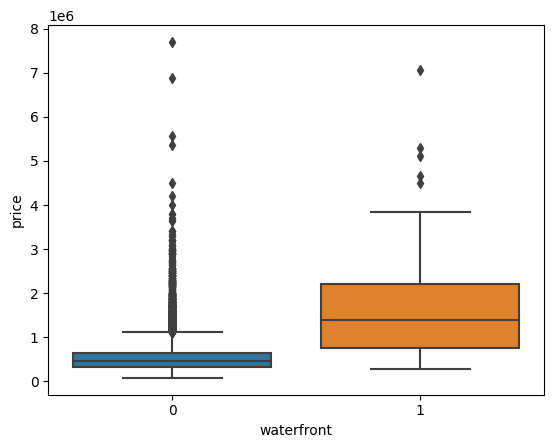

In [19]:
# sns.boxplot(data=house_df, x='price', y='waterfront', order=[0,1], orient='h')
sns.boxplot(data=house_df, x='waterfront', y='price', order=[0,1])

Determining the impact of square feet on prices.

<Axes: xlabel='sqft_above', ylabel='price'>

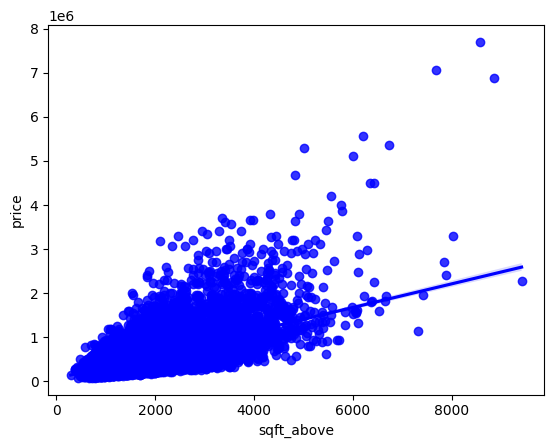

In [20]:
sns.regplot(data = house_df, x='sqft_above',y='price',color='b')

To find the feature most correlated with Price

In [21]:
house_df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Raw Model Development

In [22]:
X1 = house_df[['sqft_living']]
Y1 = house_df['price']
lm1 = LinearRegression()
lm1.fit(X1,Y1)
lm1.score(X1, Y1)*100

49.285321790379314

Picking up features whose correlation is > 25%

In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [24]:
X = house_df[features]
Y = house_df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)*100

65.76722447699446

### Using Pipelines

In [25]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [26]:
pipe = Pipeline(Input)
pipe.fit(house_df[features],house_df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [27]:
pipe.score(house_df[features],house_df['price'])

0.7513410648797747

### 80-20 Split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [29]:
print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

number of training samples: 17290
number of test samples: 4323


### Linear Regression & Cross Validation

In [30]:
lm.fit(x_train,y_train)

LinearRegression()

By default, the score method computes the R^2 value. This is same for cross_val_score as well.

In [31]:
lm.score(x_train, y_train)

0.6609927397156053

In [32]:
lm.score(x_test, y_test)

0.6459217069635976

In [33]:
Hcross = cross_val_score(lm, X, Y, cv=4)
Hcross

array([0.65014123, 0.64308611, 0.65591784, 0.66821947])

In [34]:
print("The mean of the folds are", Hcross.mean(), "and the standard deviation is" , Hcross.std())

The mean of the folds are 0.6543411661541347 and the standard deviation is 0.009211527642029763


In [35]:
-1 * cross_val_score(lm,X, Y,cv=4,scoring='neg_mean_squared_error')

array([5.01991499e+10, 4.77890278e+10, 4.29929799e+10, 4.51711703e+10])

In [36]:
Hcross1 = cross_val_score(lm, X[['sqft_living']], Y, cv=5)
Hcross1

array([0.49273122, 0.49669799, 0.47829817, 0.49515517, 0.4925489 ])

### Polynomial Model

In [38]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
pr

PolynomialFeatures(degree=5)

Will be useful later for other models as well.

In [39]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [40]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([680188.79492261, 404975.22531607, 560583.14888882, 535312.86632019,
       375612.19304871])

In [41]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [680188.79492261 404975.22531607 560583.14888882 535312.86632019]
True values: [ 459000.  445000. 1057000.  732350.]


In [42]:
poly.score(x_train_pr, y_train)

0.5307110101455799

negative score is a sign of overfitting

In [43]:
poly.score(x_test_pr, y_test)

-0.35060818911365255

Text(3, 0.75, 'Maximum R^2 ')

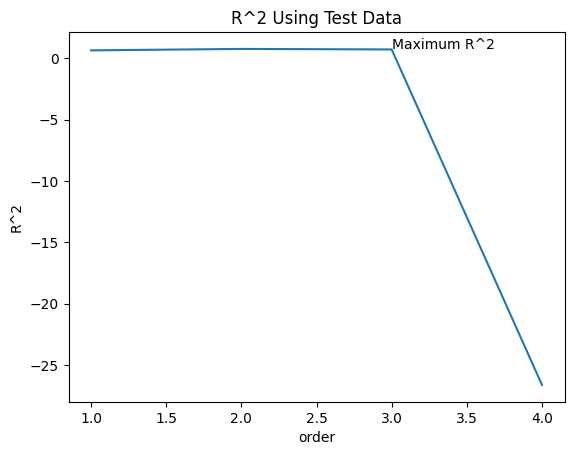

In [45]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train)

    x_test_pr = pr.fit_transform(x_test)

    lm.fit(x_train_pr, y_train)

    Rsqu_test.append(lm.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

### AUTO ML

In [44]:
from pycaret.regression import *
clf1 = setup(data = X, target = Y)

# compare models
best = compare_models()

,Description,Value
0,Session id,1606
1,Target,price
2,Target type,Regression
3,Original data shape,"(21613, 12)"
4,Transformed data shape,"(21613, 12)"
5,Transformed train set shape,"(15129, 12)"
6,Transformed test set shape,"(6484, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,88339.3655,26035998767.5156,160718.7680,0.8123,0.2091,0.1619,0.8410
rf,Random Forest Regressor,88687.7353,25949679725.3328,160724.7847,0.8117,0.2118,0.1623,6.5150
xgboost,Extreme Gradient Boosting,89685.5523,25986274918.4000,160779.7297,0.8115,0.2123,0.1640,0.3470
et,Extra Trees Regressor,88916.0856,26781366083.1269,163204.4272,0.8057,0.2138,0.1628,3.0700
gbr,Gradient Boosting Regressor,93236.4064,27032418914.9541,163876.8550,0.8044,0.2164,0.1707,1.3050
ridge,Ridge Regression,136996.3808,48148720471.1513,218753.5800,0.6530,0.4042,0.2675,0.0380
llar,Lasso Least Angle Regression,137015.0489,48148917115.8611,218756.4815,0.6530,0.4052,0.2676,0.0360
br,Bayesian Ridge,137005.0338,48149095232.1209,218755.5594,0.6530,0.4044,0.2675,0.0500
lasso,Lasso Regression,137015.0496,48148917114.3418,218756.4815,0.6530,0.4052,0.2676,0.2350
lr,Linear Regression,136952.3165,48150930656.2138,218761.4459,0.6530,0.4088,0.2673,0.4870


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### Ridge Regression

In [48]:
RidgeModel=Ridge(alpha=0.1)

In [50]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [51]:
yhat = RidgeModel.predict(x_test_pr)

In [52]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [552810.38620746 391174.31910729 849332.27444446 697590.77732146]
test set : [ 459000.  445000. 1057000.  732350.]


In [53]:
train_score = RidgeModel.score(x_train_pr, y_train)
test_score = RidgeModel.score(x_test_pr, y_test)
print(train_score,test_score)

0.12038031444802899 -46.75657097217132


To find the best value of alpha (one that minimizes the test error)

In [55]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,10))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 10/10 [02:12<00:00, 13.26s/it, Test Score=-2.1, Train Score=0.805]


### Grid Search - Hyperparameter tuning

In [57]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [58]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [59]:
Grid1.fit(X, Y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

We obtain the estimator with the best parameters.

In [63]:
BestRR=Grid1.best_estimator_
best_alpha = Grid1.best_params_['alpha']

In [64]:
BestRR.score(x_test, y_test)

0.6494489538562161

In [65]:
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X, Y)

Ridge(alpha=1)

In [66]:
best_ridge_model.score(x_test, y_test)

0.6494489538562161

### Lasso Regression

In [177]:
Las = Lasso(alpha=0.1)
Las.fit(x_train, y_train)

Lasso(alpha=0.1)

In [178]:
LRpred = Las.predict(x_test)

In [179]:
print("MAE: ",mean_absolute_error(y_test, LRpred))
print("Test accuracy: ",Las.score(x_test,y_test))
print("Train accuracy: ",Las.score(x_train,y_train))

MAE:  137348.75958244447
Test accuracy:  0.6459214756012841
Train accuracy:  0.6609927396988233


### Decision Tree

In [98]:
Dt = DecisionTreeRegressor(max_leaf_nodes=50,random_state=1)
Dt.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)

In [99]:
Dt_preds = Dt.predict(x_test)

In [100]:
mean_absolute_error(y_test, Dt_preds)

117174.06713359567

In [105]:
Dt2 = DecisionTreeRegressor(criterion = "squared_error", max_leaf_nodes=50, random_state=1)

In [106]:
Dt2.fit(x_train, y_train)
Dt2.score(x_test, y_test)

0.7104277526377757

### Random Forests

In [130]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
RF_preds = forest_model.predict(x_test)
print("MAE: ",mean_absolute_error(y_test, RF_preds))
print("Test accuracy: ",forest_model.score(x_test,y_test))
print("Train accuracy: ",forest_model.score(x_train,y_train))

MAE:  92701.71870434443
Test accuracy:  0.8003544731946975
Train accuracy:  0.9731307474325651


In [131]:
forest_model1 = RandomForestRegressor(n_estimators=100, random_state=0)
forest_model1.fit(x_train, y_train)
RF_preds1 = forest_model1.predict(x_test)
print("MAE: ",mean_absolute_error(y_test, RF_preds1))
print("Test accuracy: ",forest_model1.score(x_test,y_test))
print("Train accuracy: ",forest_model1.score(x_train,y_train))

MAE:  92703.3968903294
Test accuracy:  0.803302904925562
Train accuracy:  0.9735101408564761


In [132]:
forest_model2 = RandomForestRegressor(n_estimators=100, min_samples_split=20, random_state=0)
forest_model2.fit(x_train, y_train)
RF_preds2 = forest_model2.predict(x_test)
print("MAE: ",mean_absolute_error(y_test, RF_preds2))
print("Test accuracy: ",forest_model2.score(x_test,y_test))
print("Train accuracy: ",forest_model2.score(x_train,y_train))

MAE:  93266.44850593717
Test accuracy:  0.7866892329737247
Train accuracy:  0.9005207626964176


In [133]:
forest_model3 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=20, random_state=0)
forest_model3.fit(x_train, y_train)
RF_preds3 = forest_model3.predict(x_test)
print("MAE: ",mean_absolute_error(y_test, RF_preds3))
print("Test accuracy: ",forest_model3.score(x_test,y_test))
print("Train accuracy: ",forest_model3.score(x_train,y_train))

MAE:  93340.5341733194
Test accuracy:  0.7863567670284863
Train accuracy:  0.899883632423392


### Extreme Gradient Boosting

In [159]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=4)
my_model.fit(x_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(x_test, y_test)],
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [160]:
print("MAE: ",mean_absolute_error(y_test, my_model.predict(x_test)))
print("Test accuracy: ",my_model.score(x_test,y_test))
print("Train accuracy: ",my_model.score(x_train,y_train))

MAE:  92086.03608966574
Test accuracy:  0.809366939881835
Train accuracy:  0.8988389661918399


Verbose set to false ensures that every iteration is not displayed in the output.

In [189]:
my_model2 = XGBRegressor(learning_rate = 0.1)
my_model2.fit(x_train, y_train,eval_set=[(x_test, y_test)],verbose=False)
print("MAE: ",mean_absolute_error(y_test, my_model2.predict(x_test)))
print("Test accuracy: ",my_model2.score(x_test,y_test))
print("Train accuracy: ",my_model2.score(x_train,y_train))

MAE:  92191.07335400763
Test accuracy:  0.8089595523421995
Train accuracy:  0.9042059020051305


### Light GBM Regressor

In [206]:
LGBmodel = LGBMRegressor(learning_rate=0.2,n_estimators=150)
LGBmodel.fit(x_train,y_train,eval_set=[(x_test, y_test)])
print("MAE: ",mean_absolute_error(y_test, LGBmodel.predict(x_test)))
print("Test accuracy: ",LGBmodel.score(x_test,y_test))
print("Train accuracy: ",LGBmodel.score(x_train,y_train))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 11
[LightGBM] [Info] Start training from score 537880.614922
MAE:  91335.60498971023
Test accuracy:  0.8133869733844068
Train accuracy:  0.9324323242673912


### Extra Trees Regressor

In [180]:
ETmodel = ExtraTreesRegressor(n_estimators=100,min_samples_split=5)
ETmodel.fit(x_train,y_train)

ExtraTreesRegressor(min_samples_split=5)

In [181]:
print("MAE: ",mean_absolute_error(y_test, ETmodel.predict(x_test)))
print("Test accuracy: ",ETmodel.score(x_test,y_test))
print("Train accuracy: ",ETmodel.score(x_train,y_train))

MAE:  89914.3493696507
Test accuracy:  0.8102152827625166
Train accuracy:  0.9838134327538555


In [183]:
ETmodel1 = ExtraTreesRegressor(n_estimators=70,min_samples_split=10)
ETmodel1.fit(x_train,y_train)
print("MAE: ",mean_absolute_error(y_test, ETmodel1.predict(x_test)))
print("Test accuracy: ",ETmodel1.score(x_test,y_test))
print("Train accuracy: ",ETmodel1.score(x_train,y_train))

MAE:  89449.32721323427
Test accuracy:  0.8073505157809333
Train accuracy:  0.9455967452213432


In [186]:
ETmodel2 = ExtraTreesRegressor(n_estimators=200)
ETmodel2.fit(x_train,y_train)
print("MAE: ",mean_absolute_error(y_test, ETmodel2.predict(x_test)))
print("Test accuracy: ",ETmodel2.score(x_test,y_test))
print("Train accuracy: ",ETmodel2.score(x_train,y_train))

MAE:  90373.47718848793
Test accuracy:  0.8104870952647469
Train accuracy:  0.9992555569666394


In [187]:
ETmodel3 = ExtraTreesRegressor()
ETmodel3.fit(x_train,y_train)
print("MAE: ",mean_absolute_error(y_test, ETmodel3.predict(x_test)))
print("Test accuracy: ",ETmodel3.score(x_test,y_test))
print("Train accuracy: ",ETmodel3.score(x_train,y_train))

MAE:  90757.50799174956
Test accuracy:  0.8102731928323801
Train accuracy:  0.9992555648995184
